# Loading the CIFAR10 dataset

In [1]:
import torch
import numpy as np
import random

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [2]:
set_seed(42)

In [3]:
from utils.dataset_loader import cifar10_dataset, cifar10_dataloader
import torchvision, torch
import matplotlib.pyplot as plt
import numpy as np

train_dataset, test_dataset = cifar10_dataset()
train_dataloader, test_dataloader, val_dataloader = cifar10_dataloader(train_dataset, test_dataset, batch_size=64)

classes = train_dataset.classes
print(classes)  # ['airplane', 'automobile', 'bird', 'cat', ..., 'truck']

Files already downloaded and verified
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
def imgshow(img):
    img = img/2 + 0.5 #undo normalization
    img_np = img.numpy() #for imshow
    
    plt.imshow(np.transpose(img_np, (1, 2, 0)))
    #plt.title(classes[lbl])
    plt.axis('off')
    plt.show()


In [5]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

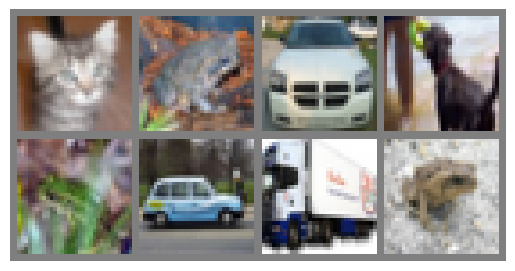

Labels:  ['cat', 'frog', 'automobile', 'dog', 'frog', 'automobile', 'truck', 'frog']


In [6]:
imgshow(torchvision.utils.make_grid(images[:8], nrow=4))
print('Labels: ', [classes[i] for i in labels[:8]])

## Training a classical CNN architecture: LeNet-5

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
from utils.model_architecture import LeNet
from utils.train import train_model

model = LeNet().to(device)
model = train_model(model, train_dataloader, val=val_dataloader, num_epochs=20, lr=1e-3)

e:\CNN-block-lab\cnnenv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/20] - Train Loss: 1.7631, Train Acc: 37.21% - Val Loss: 1.6006, Val Acc: 42.72%
Epoch [2/20] - Train Loss: 1.5057, Train Acc: 46.16% - Val Loss: 1.4675, Val Acc: 47.72%
Epoch [3/20] - Train Loss: 1.3699, Train Acc: 50.95% - Val Loss: 1.3723, Val Acc: 50.34%
Epoch [4/20] - Train Loss: 1.2768, Train Acc: 54.27% - Val Loss: 1.3146, Val Acc: 53.04%
Epoch [5/20] - Train Loss: 1.2154, Train Acc: 56.42% - Val Loss: 1.3031, Val Acc: 53.22%
Epoch [6/20] - Train Loss: 1.1666, Train Acc: 58.61% - Val Loss: 1.3077, Val Acc: 53.72%
Epoch [7/20] - Train Loss: 1.1254, Train Acc: 59.92% - Val Loss: 1.3163, Val Acc: 53.26%
Epoch [8/20] - Train Loss: 1.0932, Train Acc: 61.09% - Val Loss: 1.2751, Val Acc: 55.20%
Epoch [9/20] - Train Loss: 1.0584, Train Acc: 62.20% - Val Loss: 1.2873, Val Acc: 55.60%
Epoch [10/20] - Train Loss: 1.0281, Train Acc: 63.46% - Val Loss: 1.2935, Val Acc: 55.74%
Epoch [11/20] - Train Loss: 0.9958, Train Acc: 64.81% - Val Loss: 1.2801, Val Acc: 55.88%
Epoch [12/20] - Tra

In [9]:
train_model(model, test_dataloader, train_flag=False)

Test Loss: 198.02254647016525 & Accuracy: 57.25%


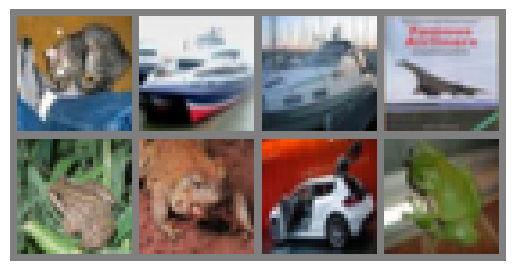

Predicted:  cat   truck automobile airplane frog  frog  automobile frog 


In [10]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

imgshow(torchvision.utils.make_grid(images[:8], nrow=4))

model.eval()
outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))